In [31]:
import torch

from torch.utils.data import DataLoader

from transformers import AutoTokenizer
from datasets import load_dataset
from transformers import AutoModelForCausalLM

from datetime import datetime
from pathlib import Path

from matplotlib import pyplot as plt

from accelerate import Accelerator

In [26]:
def read_data():
    starts = []
    ends = []
    for i in range(63):
        start = torch.load(f"../data/paths/2024-01-01_18-43-27/transformer_layer_0_inputs_batch_{i}.pt")
        end = torch.load(f"../data/paths/2024-01-01_18-43-27/transformer_layer_23_outputs_batch_{i}.pt")
        starts.append(start)
        ends.append(end)

    starts = torch.cat(starts)
    ends = torch.cat(ends)
    return starts, ends

starts, ends = read_data()

In [27]:
print(starts.shape)
print(ends.shape)

torch.Size([1000, 64, 2048])
torch.Size([1000, 64, 2048])


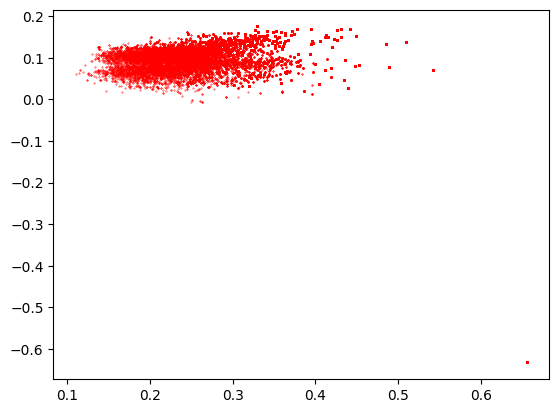

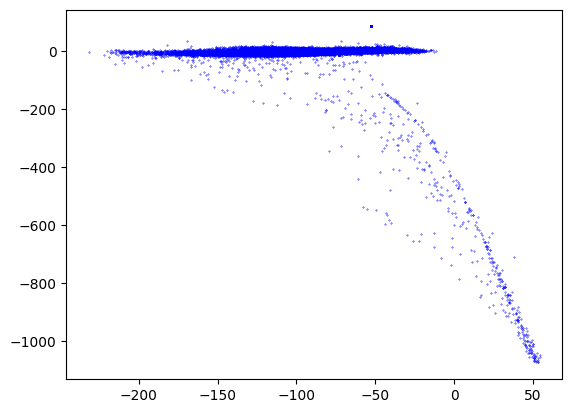

In [38]:
def project_data(X):
    X = X.reshape(-1, 2048)
    _, _, V = torch.svd(X)
    X = torch.matmul(X, V[:, :2])   
    return X

plt.scatter(*project_data(starts).detach().cpu().T, s=0.1,c='r')
plt.show()
plt.scatter(*project_data(ends).detach().cpu().T, s=0.1,c='b')
plt.show()